# Análisis descriptivo de los datos del dataset

## Carga de los datos de estudio

### Dependencias

Para una correcta ejecución del código se deduce que se tiene instalado <kbd>python3</kbd> y <kbd>jupyter-notebook</kbd> (con las dependencias que estas implican), además se requiere que estén instalados los siguientes paquetes:

-   <kbd>scikit-learn</kbd>: Módulo Python para aprendizaje automático
-   <kbd>numpy</kbd>: Procesamiento de matrices para números, cadenas, registros y objetos en Python
-   <kbd>pandas</kbd>: Kit de herramientas de análisis de datos Python flexible y potente

Además debe de encontrarse el dataset <kbd>creditcardcsvpresent.csv</kbd> en el mismo directorio que el archivo **.ipynb*

### Preparándose

Comenzamos importando las bibliotecas requeridas con el siguiente bloque de código:

In [1]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Importamos el dataset que está en formato CSV, como un DataFrame mediante el método __pd.read_csv()__, como se muestra en el siguiente fragmento de código:

In [2]:
data = pd.read_csv('creditcardcsvpresent.csv')
data=data.rename(columns={'Average Amount/transaction/day':'Average_day_transaction',
                          'Total Number of declines/day':'Number_declines_day'})
# Se obtiene el tipo de datos de las columnas de los datos mediante el método .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Merchant_id               3075 non-null   int64  
 1   Transaction date          0 non-null      float64
 2   Average_day_transaction   3075 non-null   float64
 3   Transaction_amount        3075 non-null   float64
 4   Is declined               3075 non-null   object 
 5   Number_declines_day       3075 non-null   int64  
 6   isForeignTransaction      3075 non-null   object 
 7   isHighRiskCountry         3075 non-null   object 
 8   Daily_chargeback_avg_amt  3075 non-null   int64  
 9   6_month_avg_chbk_amt      3075 non-null   float64
 10  6-month_chbk_freq         3075 non-null   int64  
 11  isFradulent               3075 non-null   object 
dtypes: float64(4), int64(4), object(4)
memory usage: 288.4+ KB


Eliminamos atributos (columnas) del dataFrame no necesarios para los modelos y mostramos el resultado

In [3]:
data.drop(['Merchant_id', 'Transaction date'], axis = 1, inplace = True)
data

Average_day_transaction  Transaction_amount Is declined  \
0                       100.0              3000.0           N   
1                       100.0              4300.0           N   
2                       185.5              4823.0           Y   
3                       185.5              5008.5           Y   
4                       500.0             26000.0           N   
...                       ...                 ...         ...   
3070                    500.0             11000.0           Y   
3071                    800.0                 0.0           Y   
3072                    800.0             20800.0           Y   
3073                   1500.0             12000.0           Y   
3074                   1500.0             36000.0           Y   

      Number_declines_day isForeignTransaction isHighRiskCountry  \
0                       5                    Y                 Y   
1                       5                    Y                 Y   
2                       5                    N                 N   
3                       8                    N                 N   
4                       0                    Y                 Y   
...                   ...                  ...               ...   
3070                    0                    N                 N   
3071                    0                    N                 N   
3072                    0                    N                 N   
3073                    0                    Y                 Y   
3074                    0                    Y                 Y   

      Daily_chargeback_avg_amt  6_month_avg_chbk_amt  6-month_chbk_freq  \
0                            0                   0.0                  0   
1                            0                   0.0                  0   
2                            0                   0.0                  0   
3                            0                   0.0                  0   
4                          800                 677.2                  6   
...                        ...                   ...                ...   
3070                       754                 585.0                  7   
3071                       754                 585.0                  7   
3072                       754                 585.0                  7   
3073                       754                 585.0                  7   
3074                       754                 585.0                  7   

     isFradulent  
0              Y  
1              Y  
2              Y  
3              Y  
4              Y  
...          ...  
3070           N  
3071           N  
3072           N  
3073           N  
3074           N  

[3075 rows x 10 columns]

In [4]:
data_val=data.select_dtypes(exclude=['object'])
data_val.head()

Average_day_transaction  Transaction_amount  Number_declines_day  \
0                    100.0              3000.0                    5   
1                    100.0              4300.0                    5   
2                    185.5              4823.0                    5   
3                    185.5              5008.5                    8   
4                    500.0             26000.0                    0   

   Daily_chargeback_avg_amt  6_month_avg_chbk_amt  6-month_chbk_freq  
0                         0                   0.0                  0  
1                         0                   0.0                  0  
2                         0                   0.0                  0  
3                         0                   0.0                  0  
4                       800                 677.2                  6

Se genera un informe tabular de estadísticas resumidas mediante el metodo __.describe()__:

In [5]:
data_val.describe()

Average_day_transaction  Transaction_amount  Number_declines_day  \
count              3075.000000         3075.000000          3075.000000   
mean                515.026556         9876.399210             0.957398   
std                 291.906978        10135.331016             2.192391   
min                   4.011527            0.000000             0.000000   
25%                 269.788047         2408.781147             0.000000   
50%                 502.549575         6698.891856             0.000000   
75%                 765.272803        14422.568935             0.000000   
max                2000.000000       108000.000000            20.000000   

       Daily_chargeback_avg_amt  6_month_avg_chbk_amt  6-month_chbk_freq  
count               3075.000000           3075.000000        3075.000000  
mean                  55.737561             40.022407           0.391870  
std                  206.634779            155.968840           1.548479  
min                    0.000000              0.000000           0.000000  
25%                    0.000000              0.000000           0.000000  
50%                    0.000000              0.000000           0.000000  
75%                    0.000000              0.000000           0.000000  
max                  998.000000            998.000000           9.000000

Analizamos la correlación de los atributos del dataFrame, para ello mostramos un mapa de color que denota la correlación mencionada, con los siguientes bloques de código: 

In [6]:
corr_val= data_val.corr()
corr_val

Average_day_transaction  Transaction_amount  \
Average_day_transaction                  1.000000            0.587111   
Transaction_amount                       0.587111            1.000000   
Number_declines_day                     -0.009682            0.259309   
Daily_chargeback_avg_amt                 0.060429            0.252298   
6_month_avg_chbk_amt                     0.060284            0.259663   
6-month_chbk_freq                        0.071849            0.297623   

                          Number_declines_day  Daily_chargeback_avg_amt  \
Average_day_transaction             -0.009682                  0.060429   
Transaction_amount                   0.259309                  0.252298   
Number_declines_day                  1.000000                  0.094834   
Daily_chargeback_avg_amt             0.094834                  1.000000   
6_month_avg_chbk_amt                 0.081138                  0.953663   
6-month_chbk_freq                    0.085028                  0.884611   

                          6_month_avg_chbk_amt  6-month_chbk_freq  
Average_day_transaction               0.060284           0.071849  
Transaction_amount                    0.259663           0.297623  
Number_declines_day                   0.081138           0.085028  
Daily_chargeback_avg_amt              0.953663           0.884611  
6_month_avg_chbk_amt                  1.000000           0.851339  
6-month_chbk_freq                     0.851339           1.000000

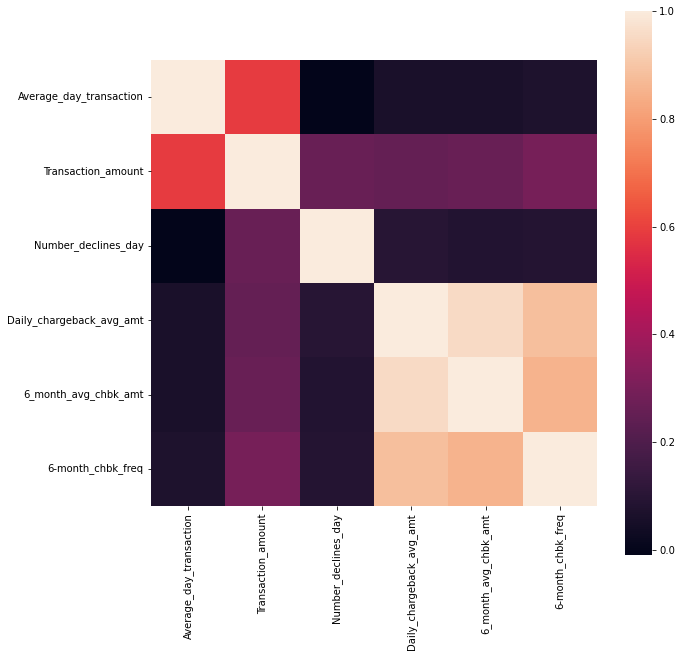

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_val, square=True)               
plt.show()

Text(0.5, 1.0, 'Matriz de correlaciones')

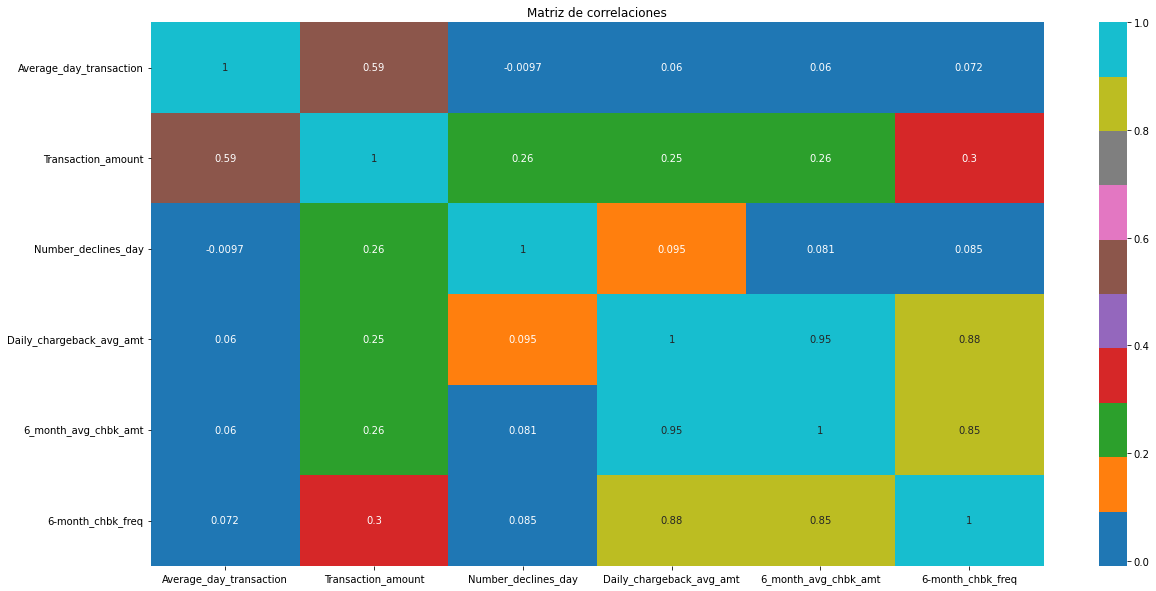

In [8]:
plt.figure(figsize = (20,10))
heatmap = sns.heatmap(data.corr(), annot=True, cmap="tab10")
heatmap.set_title("Matriz de correlaciones")

In [9]:
data_cat = data.select_dtypes(exclude=['int64', 'float64'])
data_cat

Is declined isForeignTransaction isHighRiskCountry isFradulent
0              N                    Y                 Y           Y
1              N                    Y                 Y           Y
2              Y                    N                 N           Y
3              Y                    N                 N           Y
4              N                    Y                 Y           Y
...          ...                  ...               ...         ...
3070           Y                    N                 N           N
3071           Y                    N                 N           N
3072           Y                    N                 N           N
3073           Y                    Y                 Y           N
3074           Y                    Y                 Y           N

[3075 rows x 4 columns]

In [10]:
for col in data_cat.columns:
    print(data_cat[col].unique())
    print(data_cat[col].value_counts())

['N' 'Y']
N    3018
Y      57
Name: Is declined, dtype: int64
['Y' 'N']
N    2369
Y     706
Name: isForeignTransaction, dtype: int64
['Y' 'N']
N    2870
Y     205
Name: isHighRiskCountry, dtype: int64
['Y' 'N']
N    2627
Y     448
Name: isFradulent, dtype: int64


In [11]:
data_icat = data_cat.apply(LabelEncoder().fit_transform)
data_icat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Is declined           3075 non-null   int64
 1   isForeignTransaction  3075 non-null   int64
 2   isHighRiskCountry     3075 non-null   int64
 3   isFradulent           3075 non-null   int64
dtypes: int64(4)
memory usage: 96.2 KB


In [12]:
data_true = pd.concat([data_val, data_icat], axis = 1)
data_true1 = pd.concat([data_val, data_icat], axis = 1)

data_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average_day_transaction   3075 non-null   float64
 1   Transaction_amount        3075 non-null   float64
 2   Number_declines_day       3075 non-null   int64  
 3   Daily_chargeback_avg_amt  3075 non-null   int64  
 4   6_month_avg_chbk_amt      3075 non-null   float64
 5   6-month_chbk_freq         3075 non-null   int64  
 6   Is declined               3075 non-null   int64  
 7   isForeignTransaction      3075 non-null   int64  
 8   isHighRiskCountry         3075 non-null   int64  
 9   isFradulent               3075 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 240.4 KB


In [13]:
data_true

Average_day_transaction  Transaction_amount  Number_declines_day  \
0                       100.0              3000.0                    5   
1                       100.0              4300.0                    5   
2                       185.5              4823.0                    5   
3                       185.5              5008.5                    8   
4                       500.0             26000.0                    0   
...                       ...                 ...                  ...   
3070                    500.0             11000.0                    0   
3071                    800.0                 0.0                    0   
3072                    800.0             20800.0                    0   
3073                   1500.0             12000.0                    0   
3074                   1500.0             36000.0                    0   

      Daily_chargeback_avg_amt  6_month_avg_chbk_amt  6-month_chbk_freq  \
0                            0                   0.0                  0   
1                            0                   0.0                  0   
2                            0                   0.0                  0   
3                            0                   0.0                  0   
4                          800                 677.2                  6   
...                        ...                   ...                ...   
3070                       754                 585.0                  7   
3071                       754                 585.0                  7   
3072                       754                 585.0                  7   
3073                       754                 585.0                  7   
3074                       754                 585.0                  7   

      Is declined  isForeignTransaction  isHighRiskCountry  isFradulent  
0               0                     1                  1            1  
1               0                     1                  1            1  
2               1                     0                  0            1  
3               1                     0                  0            1  
4               0                     1                  1            1  
...           ...                   ...                ...          ...  
3070            1                     0                  0            0  
3071            1                     0                  0            0  
3072            1                     0                  0            0  
3073            1                     1                  1            0  
3074            1                     1                  1            0  

[3075 rows x 10 columns]

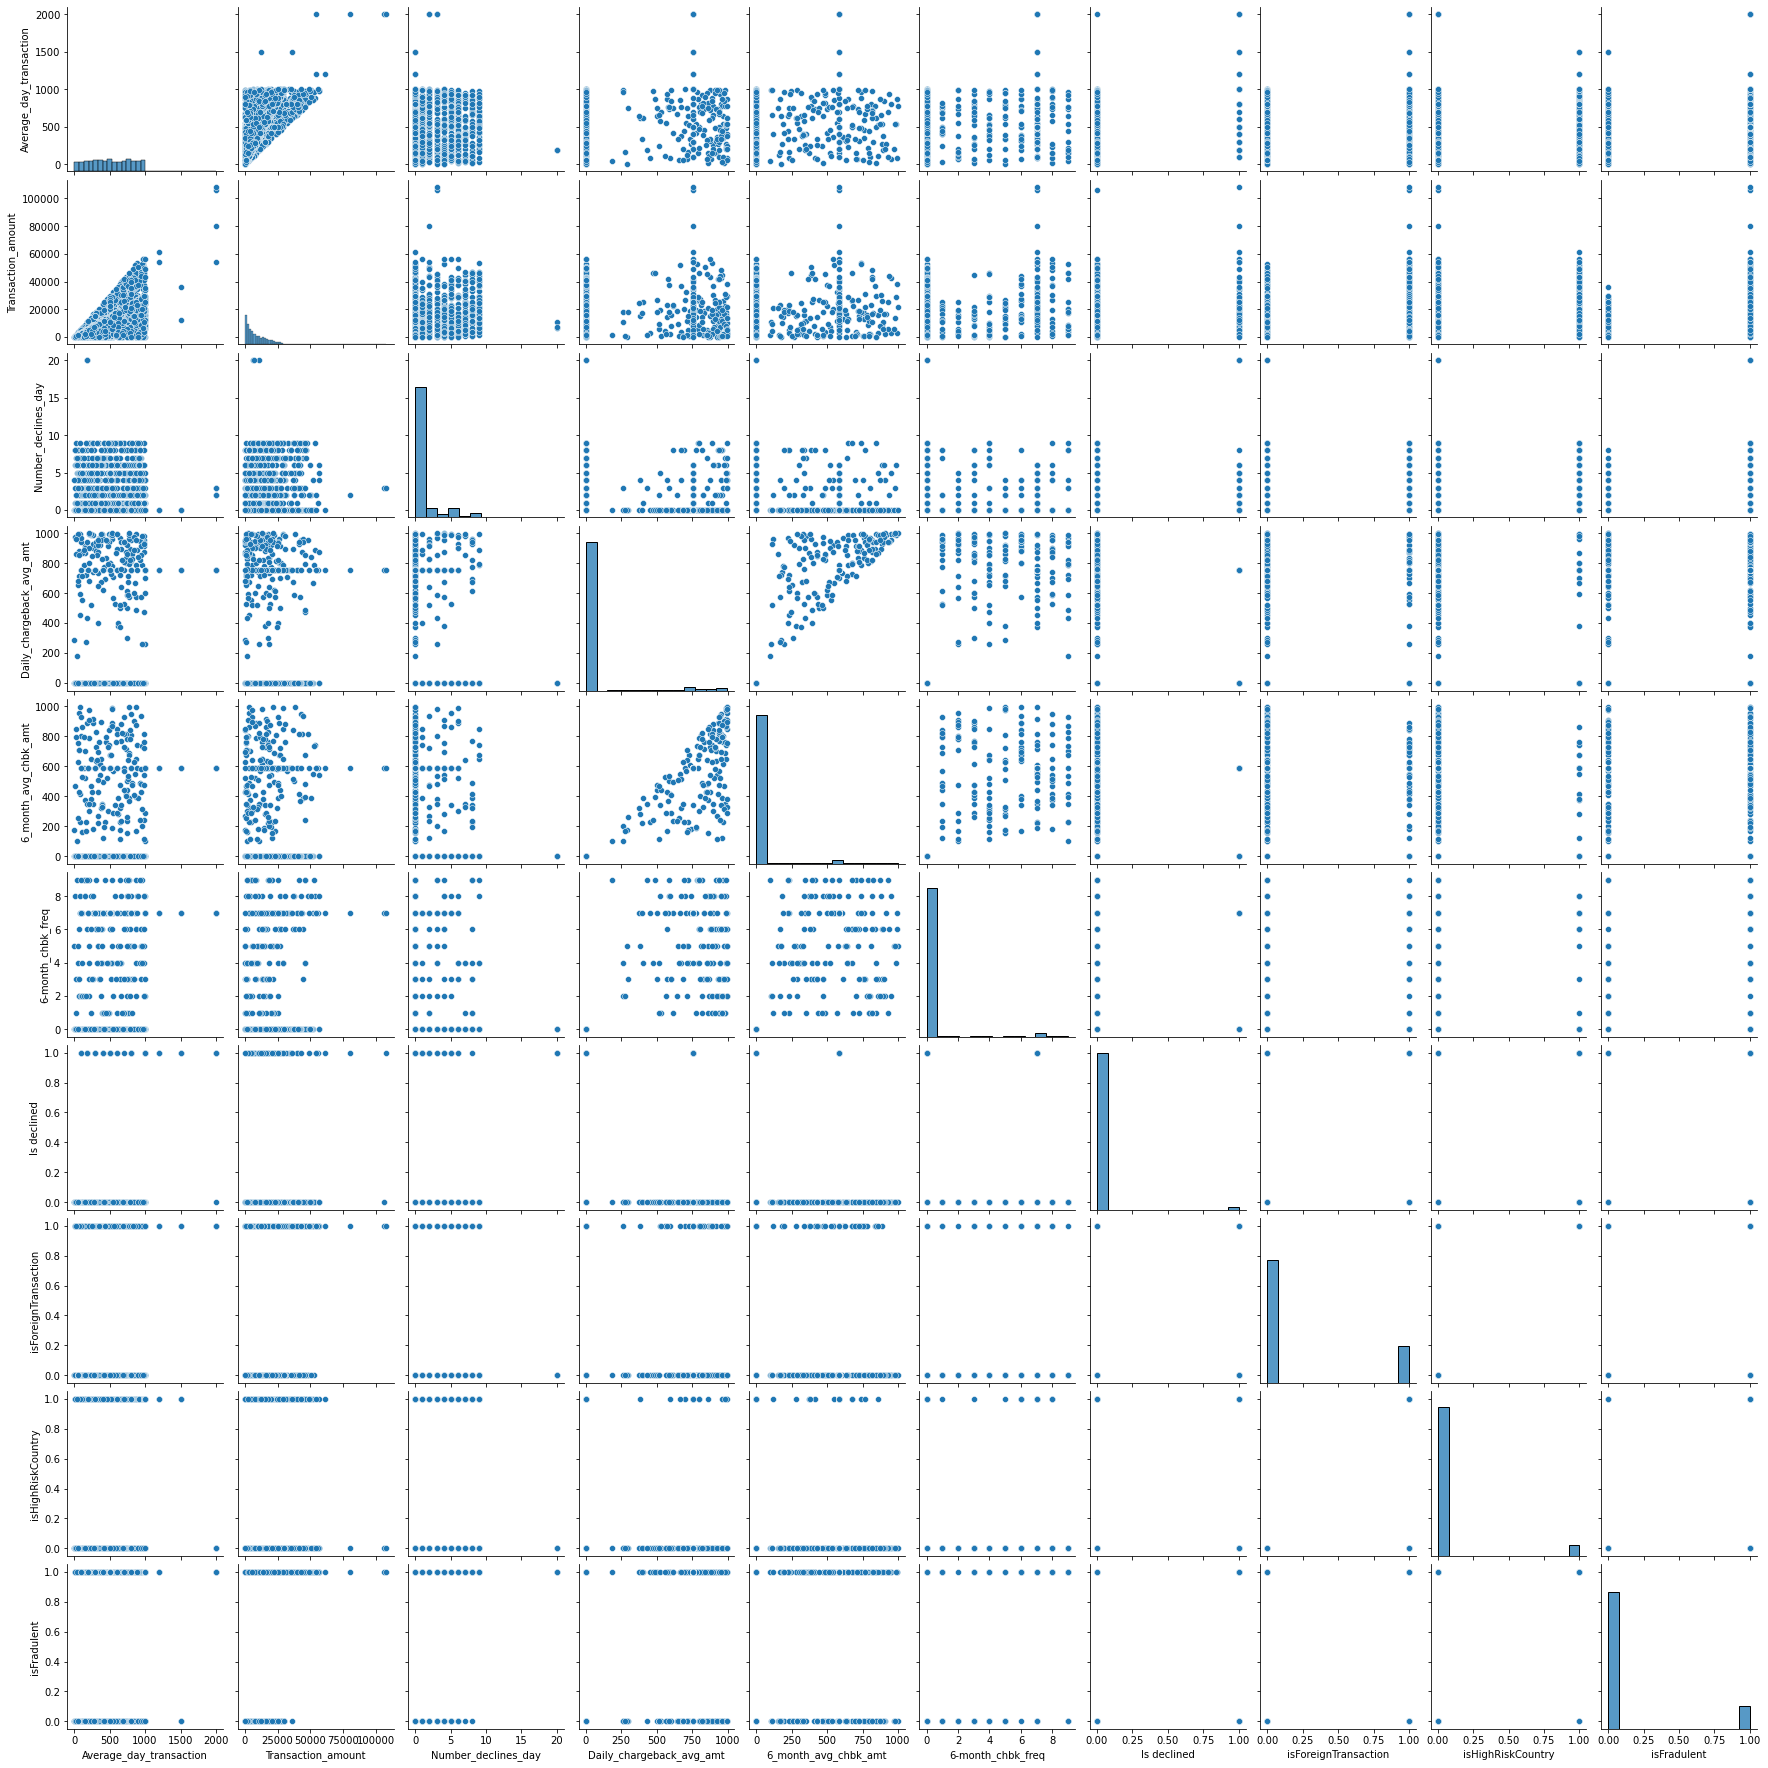

In [14]:
sns.pairplot(data_true)
# sns.pairplot(data_true, corner = True)

## z-score & Insolated Random Forest

Aplicando z score, isolatedRandomForest a tabla en general

In [15]:
data_ztrue = data_true.apply(stats.zscore)
data_ztrue


Average_day_transaction  Transaction_amount  Number_declines_day  \
0                   -1.422008           -0.678569             1.844224   
1                   -1.422008           -0.550284             1.844224   
2                   -1.129059           -0.498674             1.844224   
3                   -1.129059           -0.480368             3.212815   
4                   -0.051486            1.591090            -0.436762   
...                       ...                 ...                  ...   
3070                -0.051486            0.110878            -0.436762   
3071                 0.976406           -0.974611            -0.436762   
3072                 0.976406            1.077950            -0.436762   
3073                 3.374820            0.209559            -0.436762   
3074                 3.374820            2.577898            -0.436762   

      Daily_chargeback_avg_amt  6_month_avg_chbk_amt  6-month_chbk_freq  \
0                    -0.269783             -0.256647          -0.253109   
1                    -0.269783             -0.256647          -0.253109   
2                    -0.269783             -0.256647          -0.253109   
3                    -0.269783             -0.256647          -0.253109   
4                     3.602411              4.085952           3.622292   
...                        ...                   ...                ...   
3070                  3.379760              3.494712           4.268192   
3071                  3.379760              3.494712           4.268192   
3072                  3.379760              3.494712           4.268192   
3073                  3.379760              3.494712           4.268192   
3074                  3.379760              3.494712           4.268192   

      Is declined  isForeignTransaction  isHighRiskCountry  isFradulent  
0       -0.137429              1.831809           3.741657     2.421537  
1       -0.137429              1.831809           3.741657     2.421537  
2        7.276494             -0.545908          -0.267261     2.421537  
3        7.276494             -0.545908          -0.267261     2.421537  
4       -0.137429              1.831809           3.741657     2.421537  
...           ...                   ...                ...          ...  
3070     7.276494             -0.545908          -0.267261    -0.412961  
3071     7.276494             -0.545908          -0.267261    -0.412961  
3072     7.276494             -0.545908          -0.267261    -0.412961  
3073     7.276494              1.831809           3.741657    -0.412961  
3074     7.276494              1.831809           3.741657    -0.412961  

[3075 rows x 10 columns]

Mostramos el arbol, con el siguiente bloque de código:

/home/josue/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


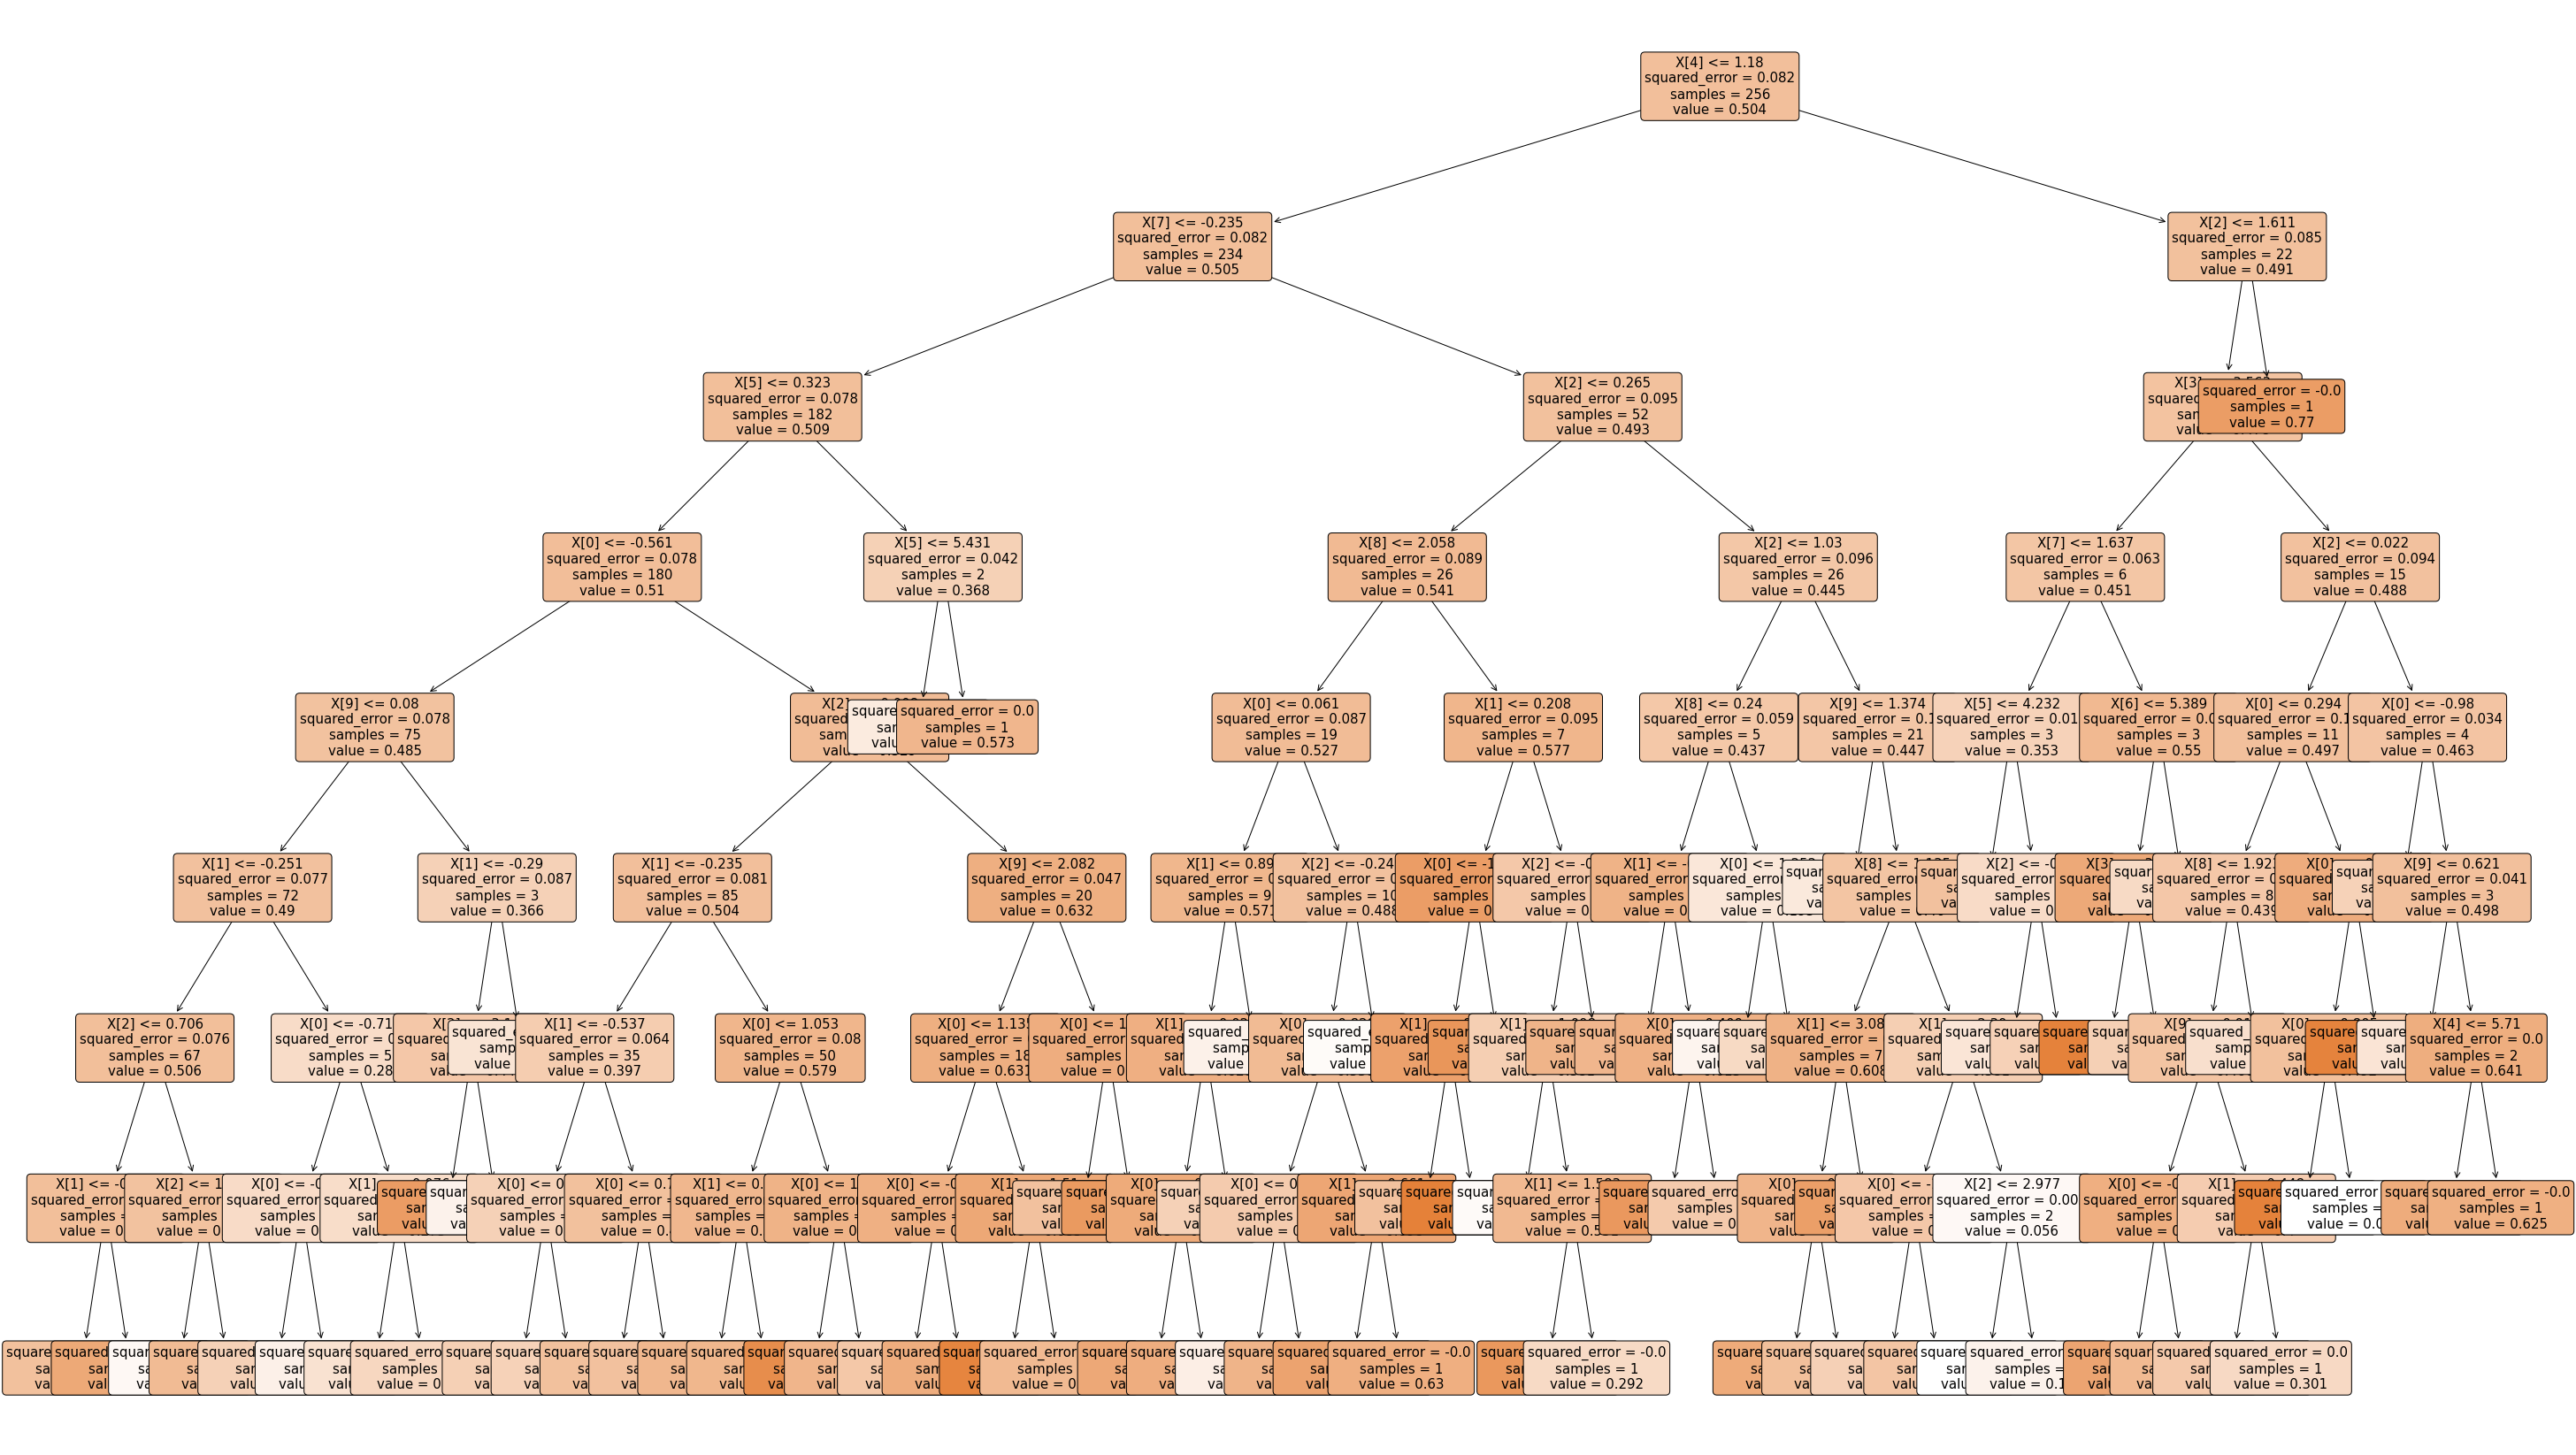

In [16]:
model = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = float(0.2), random_state = 43)
model.fit(data_ztrue)

arbol = model.estimators_[20]

plt.figure(figsize = (50, 30))
a = plot_tree(arbol, filled = True, rounded = True, fontsize = 15) 

In [17]:
data_true.info()
data_ztrue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average_day_transaction   3075 non-null   float64
 1   Transaction_amount        3075 non-null   float64
 2   Number_declines_day       3075 non-null   int64  
 3   Daily_chargeback_avg_amt  3075 non-null   int64  
 4   6_month_avg_chbk_amt      3075 non-null   float64
 5   6-month_chbk_freq         3075 non-null   int64  
 6   Is declined               3075 non-null   int64  
 7   isForeignTransaction      3075 non-null   int64  
 8   isHighRiskCountry         3075 non-null   int64  
 9   isFradulent               3075 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 240.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------        

Mostramos aquellas instancias que son identificadas como anomalias

In [92]:
data_ztrue['anomaly_score'] = model.predict(data_ztrue)
data_ztrue[data_ztrue['anomaly_score']==-1]

Average_day_transaction  Transaction_amount  Number_declines_day  \
0                   -1.422008           -0.678569             1.844224   
1                   -1.422008           -0.550284             1.844224   
2                   -1.129059           -0.498674             1.844224   
3                   -1.129059           -0.480368             3.212815   
4                   -0.051486            1.591090            -0.436762   
...                       ...                 ...                  ...   
3070                -0.051486            0.110878            -0.436762   
3071                 0.976406           -0.974611            -0.436762   
3072                 0.976406            1.077950            -0.436762   
3073                 3.374820            0.209559            -0.436762   
3074                 3.374820            2.577898            -0.436762   

      Daily_chargeback_avg_amt  6_month_avg_chbk_amt  6-month_chbk_freq  \
0                    -0.269783             -0.256647          -0.253109   
1                    -0.269783             -0.256647          -0.253109   
2                    -0.269783             -0.256647          -0.253109   
3                    -0.269783             -0.256647          -0.253109   
4                     3.602411              4.085952           3.622292   
...                        ...                   ...                ...   
3070                  3.379760              3.494712           4.268192   
3071                  3.379760              3.494712           4.268192   
3072                  3.379760              3.494712           4.268192   
3073                  3.379760              3.494712           4.268192   
3074                  3.379760              3.494712           4.268192   

      Is declined  isForeignTransaction  isHighRiskCountry  isFradulent  \
0       -0.137429              1.831809           3.741657     2.421537   
1       -0.137429              1.831809           3.741657     2.421537   
2        7.276494             -0.545908          -0.267261     2.421537   
3        7.276494             -0.545908          -0.267261     2.421537   
4       -0.137429              1.831809           3.741657     2.421537   
...           ...                   ...                ...          ...   
3070     7.276494             -0.545908          -0.267261    -0.412961   
3071     7.276494             -0.545908          -0.267261    -0.412961   
3072     7.276494             -0.545908          -0.267261    -0.412961   
3073     7.276494              1.831809           3.741657    -0.412961   
3074     7.276494              1.831809           3.741657    -0.412961   

      anomaly_score  
0                -1  
1                -1  
2                -1  
3                -1  
4                -1  
...             ...  
3070             -1  
3071             -1  
3072             -1  
3073             -1  
3074             -1  

[615 rows x 11 columns]

Con lo siguiente determinamos cuantas instancias se detectaron como anomalias (-1)

In [83]:
data_ztrue["anomaly_score"].value_counts()

 1    2460
-1     615
Name: anomaly_score, dtype: int64

## DBScan

Normalizamos los valores del dataFrame

In [18]:
scaler = MinMaxScaler()
data_mM = scaler.fit_transform(data_true1)
data_mM = pd.DataFrame(data_mM, columns = data_true1.columns)
data_mM

Average_day_transaction  Transaction_amount  Number_declines_day  \
0                    0.048091            0.027778                 0.25   
1                    0.048091            0.039815                 0.25   
2                    0.090927            0.044657                 0.25   
3                    0.090927            0.046375                 0.40   
4                    0.248493            0.240741                 0.00   
...                       ...                 ...                  ...   
3070                 0.248493            0.101852                 0.00   
3071                 0.398794            0.000000                 0.00   
3072                 0.398794            0.192593                 0.00   
3073                 0.749498            0.111111                 0.00   
3074                 0.749498            0.333333                 0.00   

      Daily_chargeback_avg_amt  6_month_avg_chbk_amt  6-month_chbk_freq  \
0                     0.000000              0.000000           0.000000   
1                     0.000000              0.000000           0.000000   
2                     0.000000              0.000000           0.000000   
3                     0.000000              0.000000           0.000000   
4                     0.801603              0.678557           0.666667   
...                        ...                   ...                ...   
3070                  0.755511              0.586172           0.777778   
3071                  0.755511              0.586172           0.777778   
3072                  0.755511              0.586172           0.777778   
3073                  0.755511              0.586172           0.777778   
3074                  0.755511              0.586172           0.777778   

      Is declined  isForeignTransaction  isHighRiskCountry  isFradulent  
0             0.0                   1.0                1.0          1.0  
1             0.0                   1.0                1.0          1.0  
2             1.0                   0.0                0.0          1.0  
3             1.0                   0.0                0.0          1.0  
4             0.0                   1.0                1.0          1.0  
...           ...                   ...                ...          ...  
3070          1.0                   0.0                0.0          0.0  
3071          1.0                   0.0                0.0          0.0  
3072          1.0                   0.0                0.0          0.0  
3073          1.0                   1.0                1.0          0.0  
3074          1.0                   1.0                1.0          0.0  

[3075 rows x 10 columns]

Aplicamos BDScan, el valor minimo para que el agrupamiento muestre valores atipicos es con eps = 0.7 y min_samples=10

In [19]:
outlier_detection = DBSCAN(eps = .7, metric = 'euclidean', min_samples = 10, n_jobs = -1)
clusters = outlier_detection.fit_predict(data_mM)
data_true1['clase'] = outlier_detection.fit_predict(data_mM)
clusters

array([ 0,  0, -1, ..., -1, -1, -1])

Graficamos las agrupaciones en relación a la columna __isFraudulent__

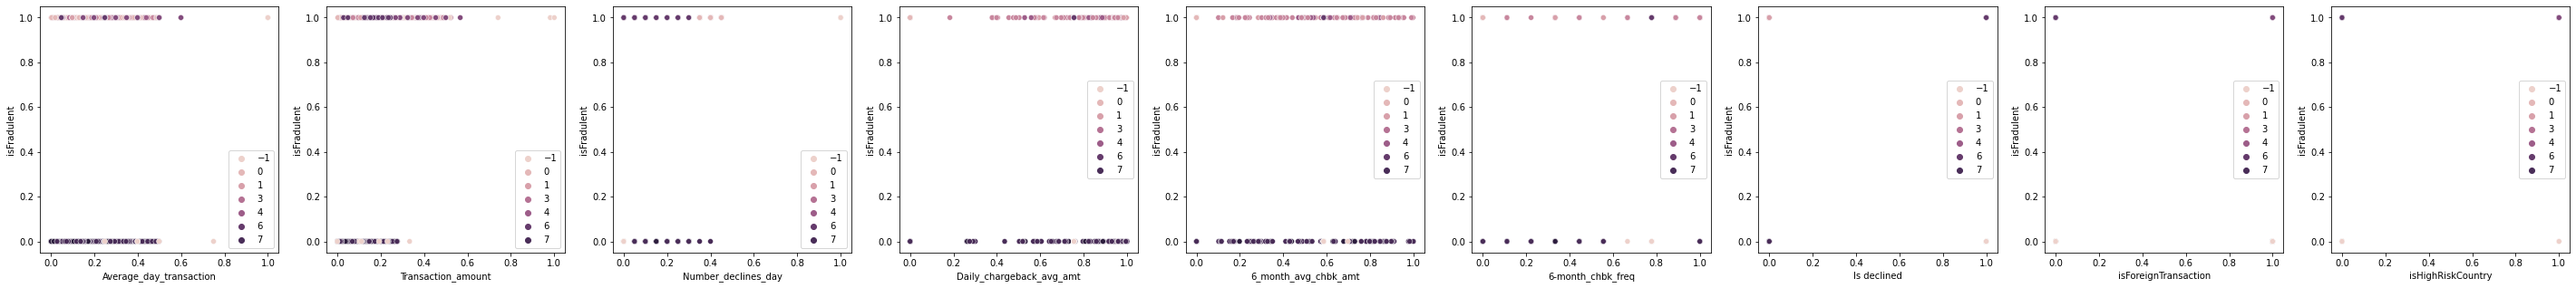

In [20]:
fig, axs = plt.subplots(figsize=(50,5), ncols= 9)
i = 0
for cl in data_mM.drop("isFradulent", axis=1).columns:
    sns.scatterplot(data = data_mM, x= cl, y = 'isFradulent', hue = clusters, ax=axs[i])
    i = i+1

Mostramos las instancias con anomalias (atipicas)

In [21]:
anomaly = data_true1.loc[data_true1['clase'] == -1]
anomaly_index = list(anomaly.index)
print("Se detectarón", anomaly.shape[0], "valores atípicos")
anomaly


Se detectarón 26 valores atípicos


Average_day_transaction  Transaction_amount  Number_declines_day  \
2                  185.500000         4823.000000                    5   
3                  185.500000         5008.500000                    8   
7                  185.500000        11130.000000                   20   
8                  185.500000         6121.500000                   20   
9                  185.500000         7049.000000                   20   
397               1000.000000        56000.000000                    1   
398               2000.000000        54000.000000                    2   
399               2000.000000       106000.000000                    3   
403               1000.000000        27000.000000                    0   
404               1000.000000        34000.000000                    1   
405               2000.000000        80000.000000                    2   
406               2000.000000       108000.000000                    3   
407               1000.000000        29000.000000                    4   
408                500.000000        23000.000000                    5   
409                300.000000        15300.000000                    6   
448                185.500000         5008.500000                    0   
449                185.500000          742.000000                    1   
450                185.500000         2411.500000                    2   
1524                53.243291          851.892661                    4   
1944               338.061694          338.061694                    4   
3069              1000.000000        25000.000000                    0   
3070               500.000000        11000.000000                    0   
3071               800.000000            0.000000                    0   
3072               800.000000        20800.000000                    0   
3073              1500.000000        12000.000000                    0   
3074              1500.000000        36000.000000                    0   

      Daily_chargeback_avg_amt  6_month_avg_chbk_amt  6-month_chbk_freq  \
2                            0                   0.0                  0   
3                            0                   0.0                  0   
7                            0                   0.0                  0   
8                            0                   0.0                  0   
9                            0                   0.0                  0   
397                        754                 585.0                  7   
398                        754                 585.0                  7   
399                        754                 585.0                  7   
403                        754                 585.0                  7   
404                        754                 585.0                  7   
405                        754                 585.0                  7   
406                        754                 585.0                  7   
407                        754                 585.0                  7   
408                        754                 585.0                  7   
409                        754                 585.0                  7   
448                          0                   0.0                  0   
449                          0                   0.0                  0   
450                          0                   0.0                  0   
1524                       995                 755.0                  3   
1944                       954                 696.0                  6   
3069                       754                 585.0                  7   
3070                       754                 585.0                  7   
3071                       754                 585.0                  7   
3072                       754                 585.0                  7   
3073                       754                 585.0                  7   
3074                       754                 585.0     

Aplicando z score, IsolatedRandomForest a cada uno de las columnas

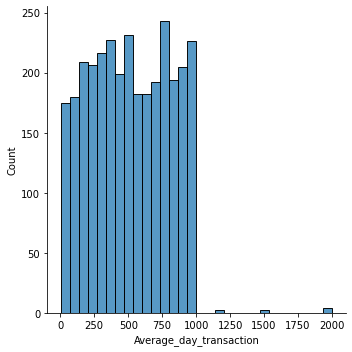

In [23]:
data_true['z-score1'] = (data_true['Average_day_transaction']-data_true['Average_day_transaction'].mean())/data_true['Average_day_transaction'].std()
sns.displot(data_true['Average_day_transaction'])

In [24]:
data1 = data_true.loc[:, ['Average_day_transaction', 'z-score1']]

cond1 = data1['z-score1']>3
cond2= data1['z-score1']<-3

outliers=data1[cond1 | cond2]
outliers.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 398 to 3074
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Average_day_transaction  6 non-null      float64
 1   z-score1                 6 non-null      float64
dtypes: float64(2)
memory usage: 144.0 bytes


/home/josue/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


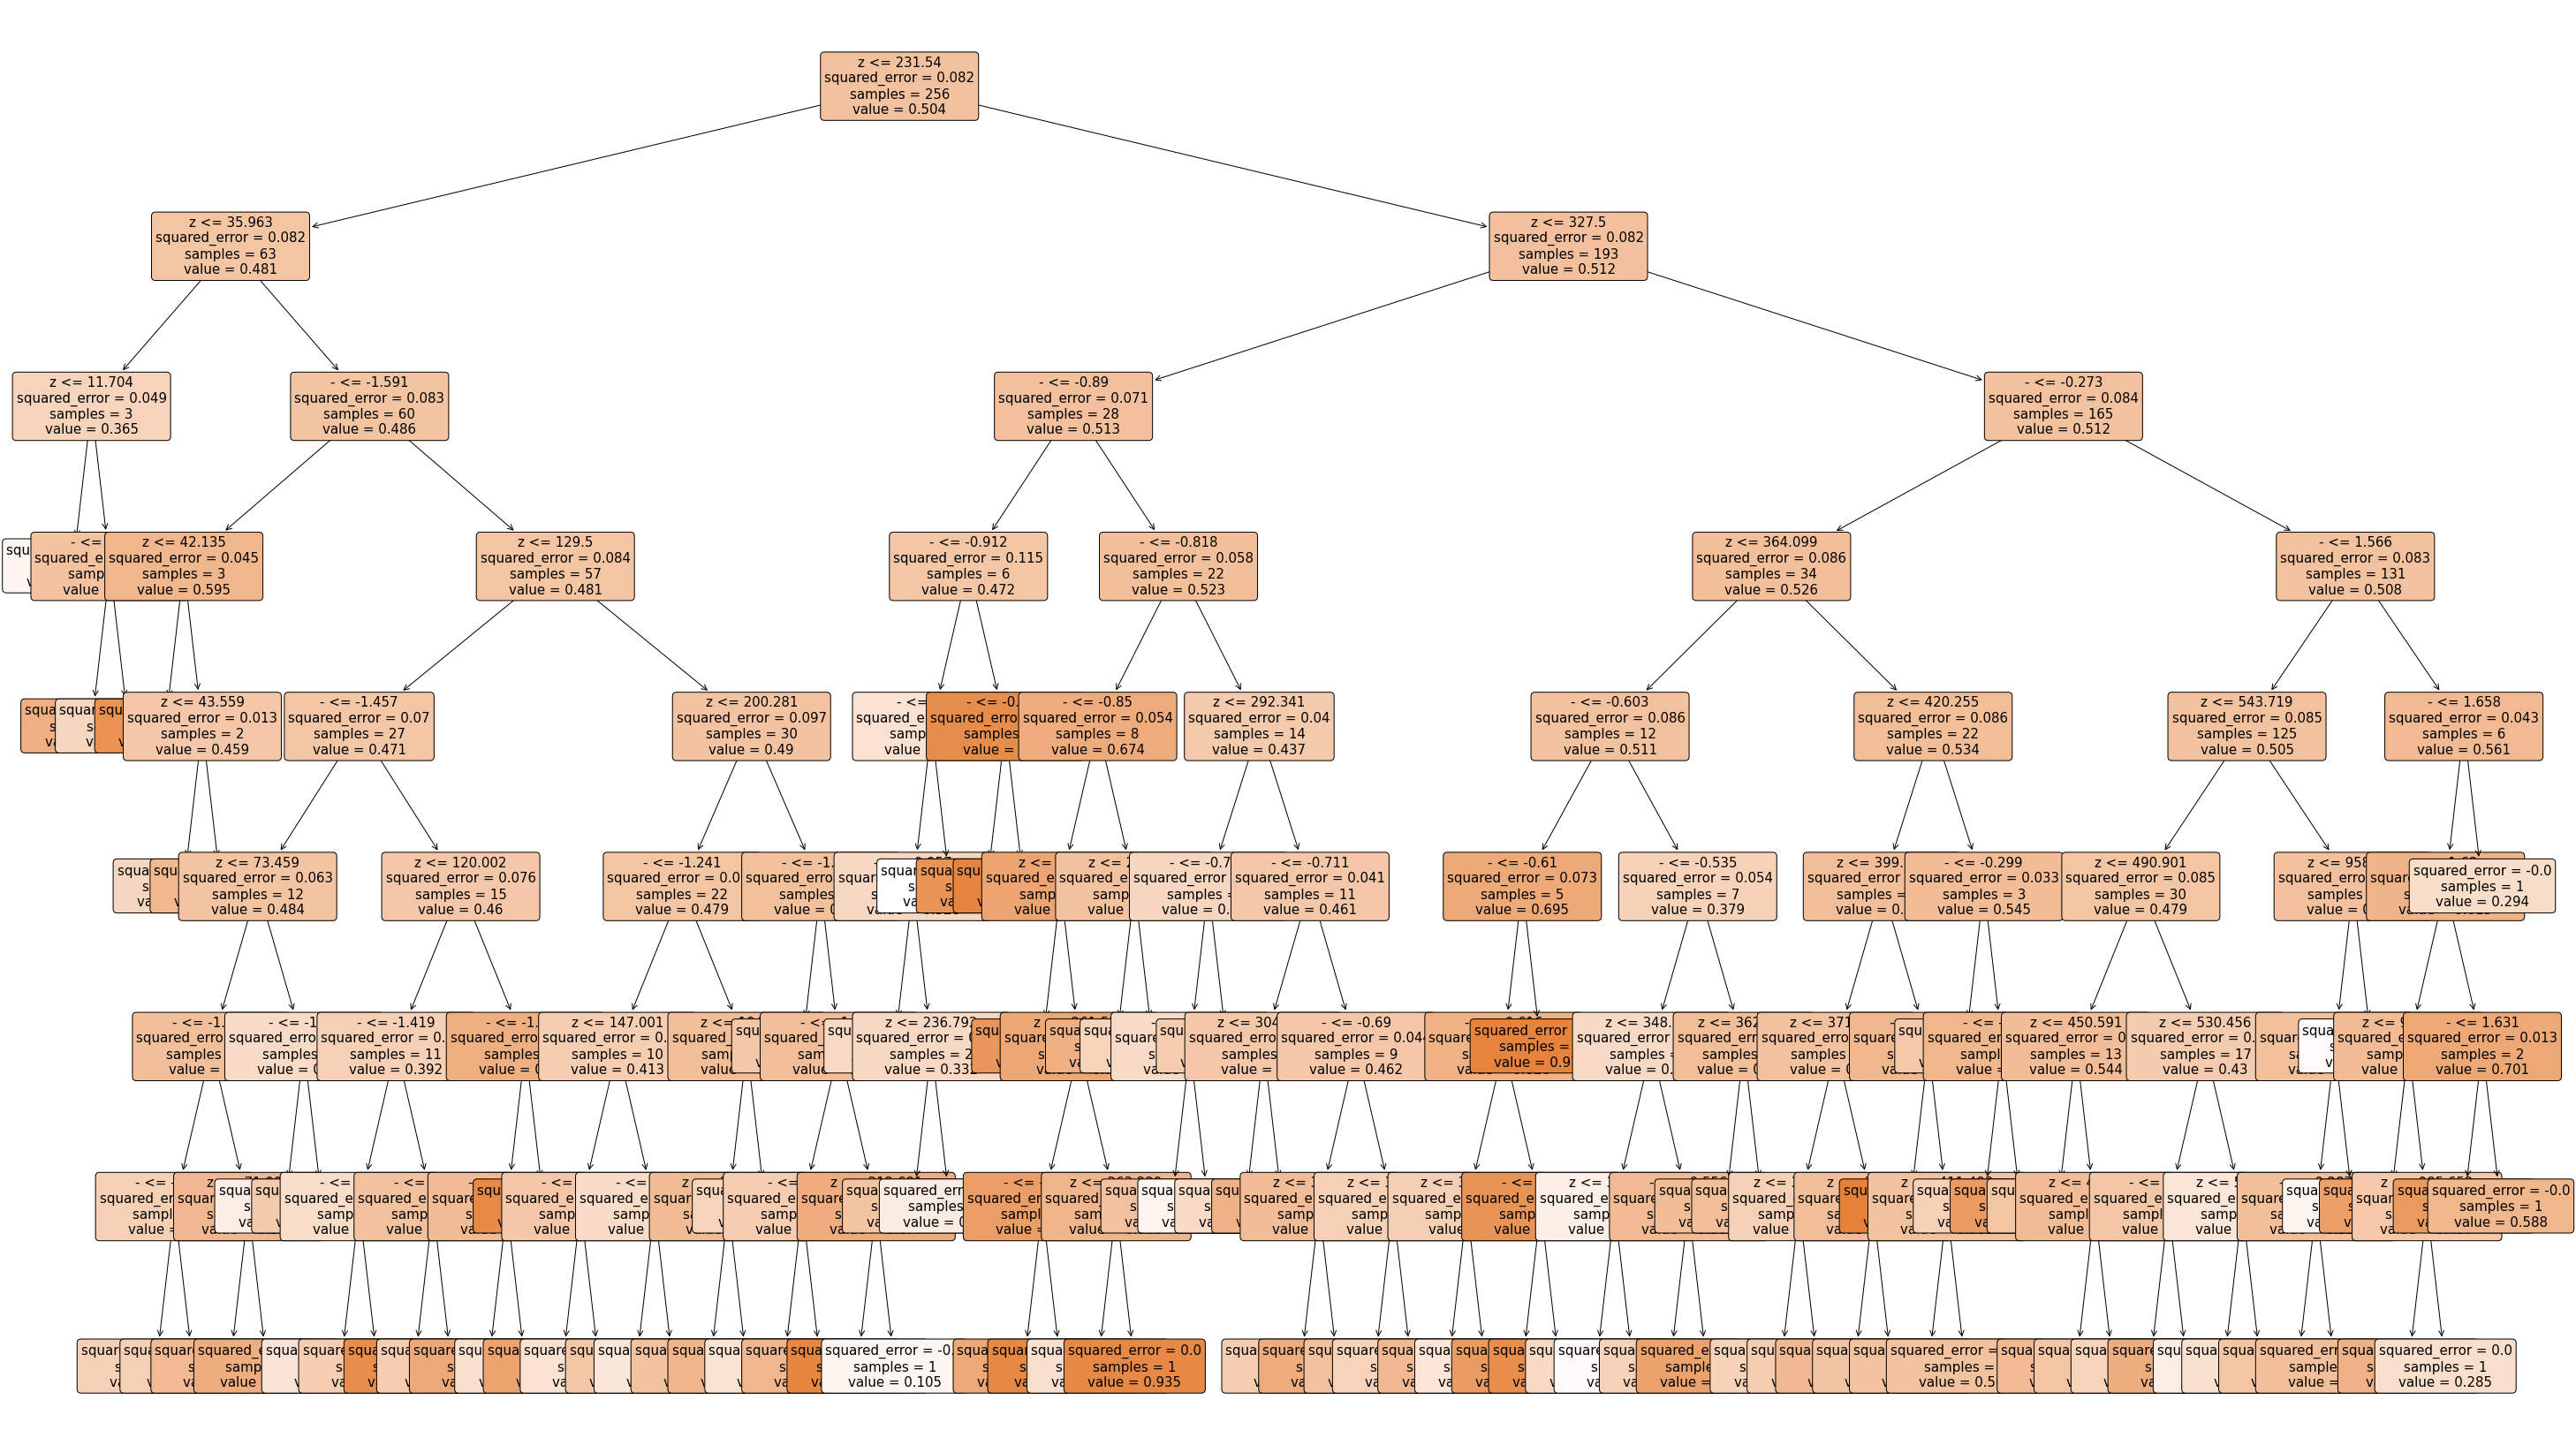

In [25]:
model1 = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = float(0.2), random_state = 43)
model1.fit(data1)

arbol1 = model1.estimators_[20]

plt.figure(figsize = (50, 30))
a = plot_tree(arbol1, feature_names = 'z-score1', filled = True, rounded = True, fontsize = 15) 

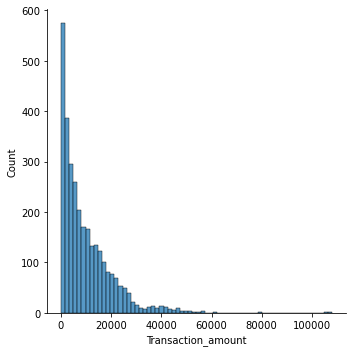

In [26]:
data_true['z-score2'] = (data_true['Transaction_amount']-data_true['Transaction_amount'].mean())/data_true['Transaction_amount'].std()
sns.displot(data_true['Transaction_amount'])

In [27]:
data2 = data_true.loc[:, ['Transaction_amount', 'z-score2']]
cond1 = data2['z-score2']>3
cond2= data2['z-score2']<-3

outliers=data2[cond1 | cond2]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 21 to 442
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_amount  62 non-null     float64
 1   z-score2            62 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


/home/josue/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


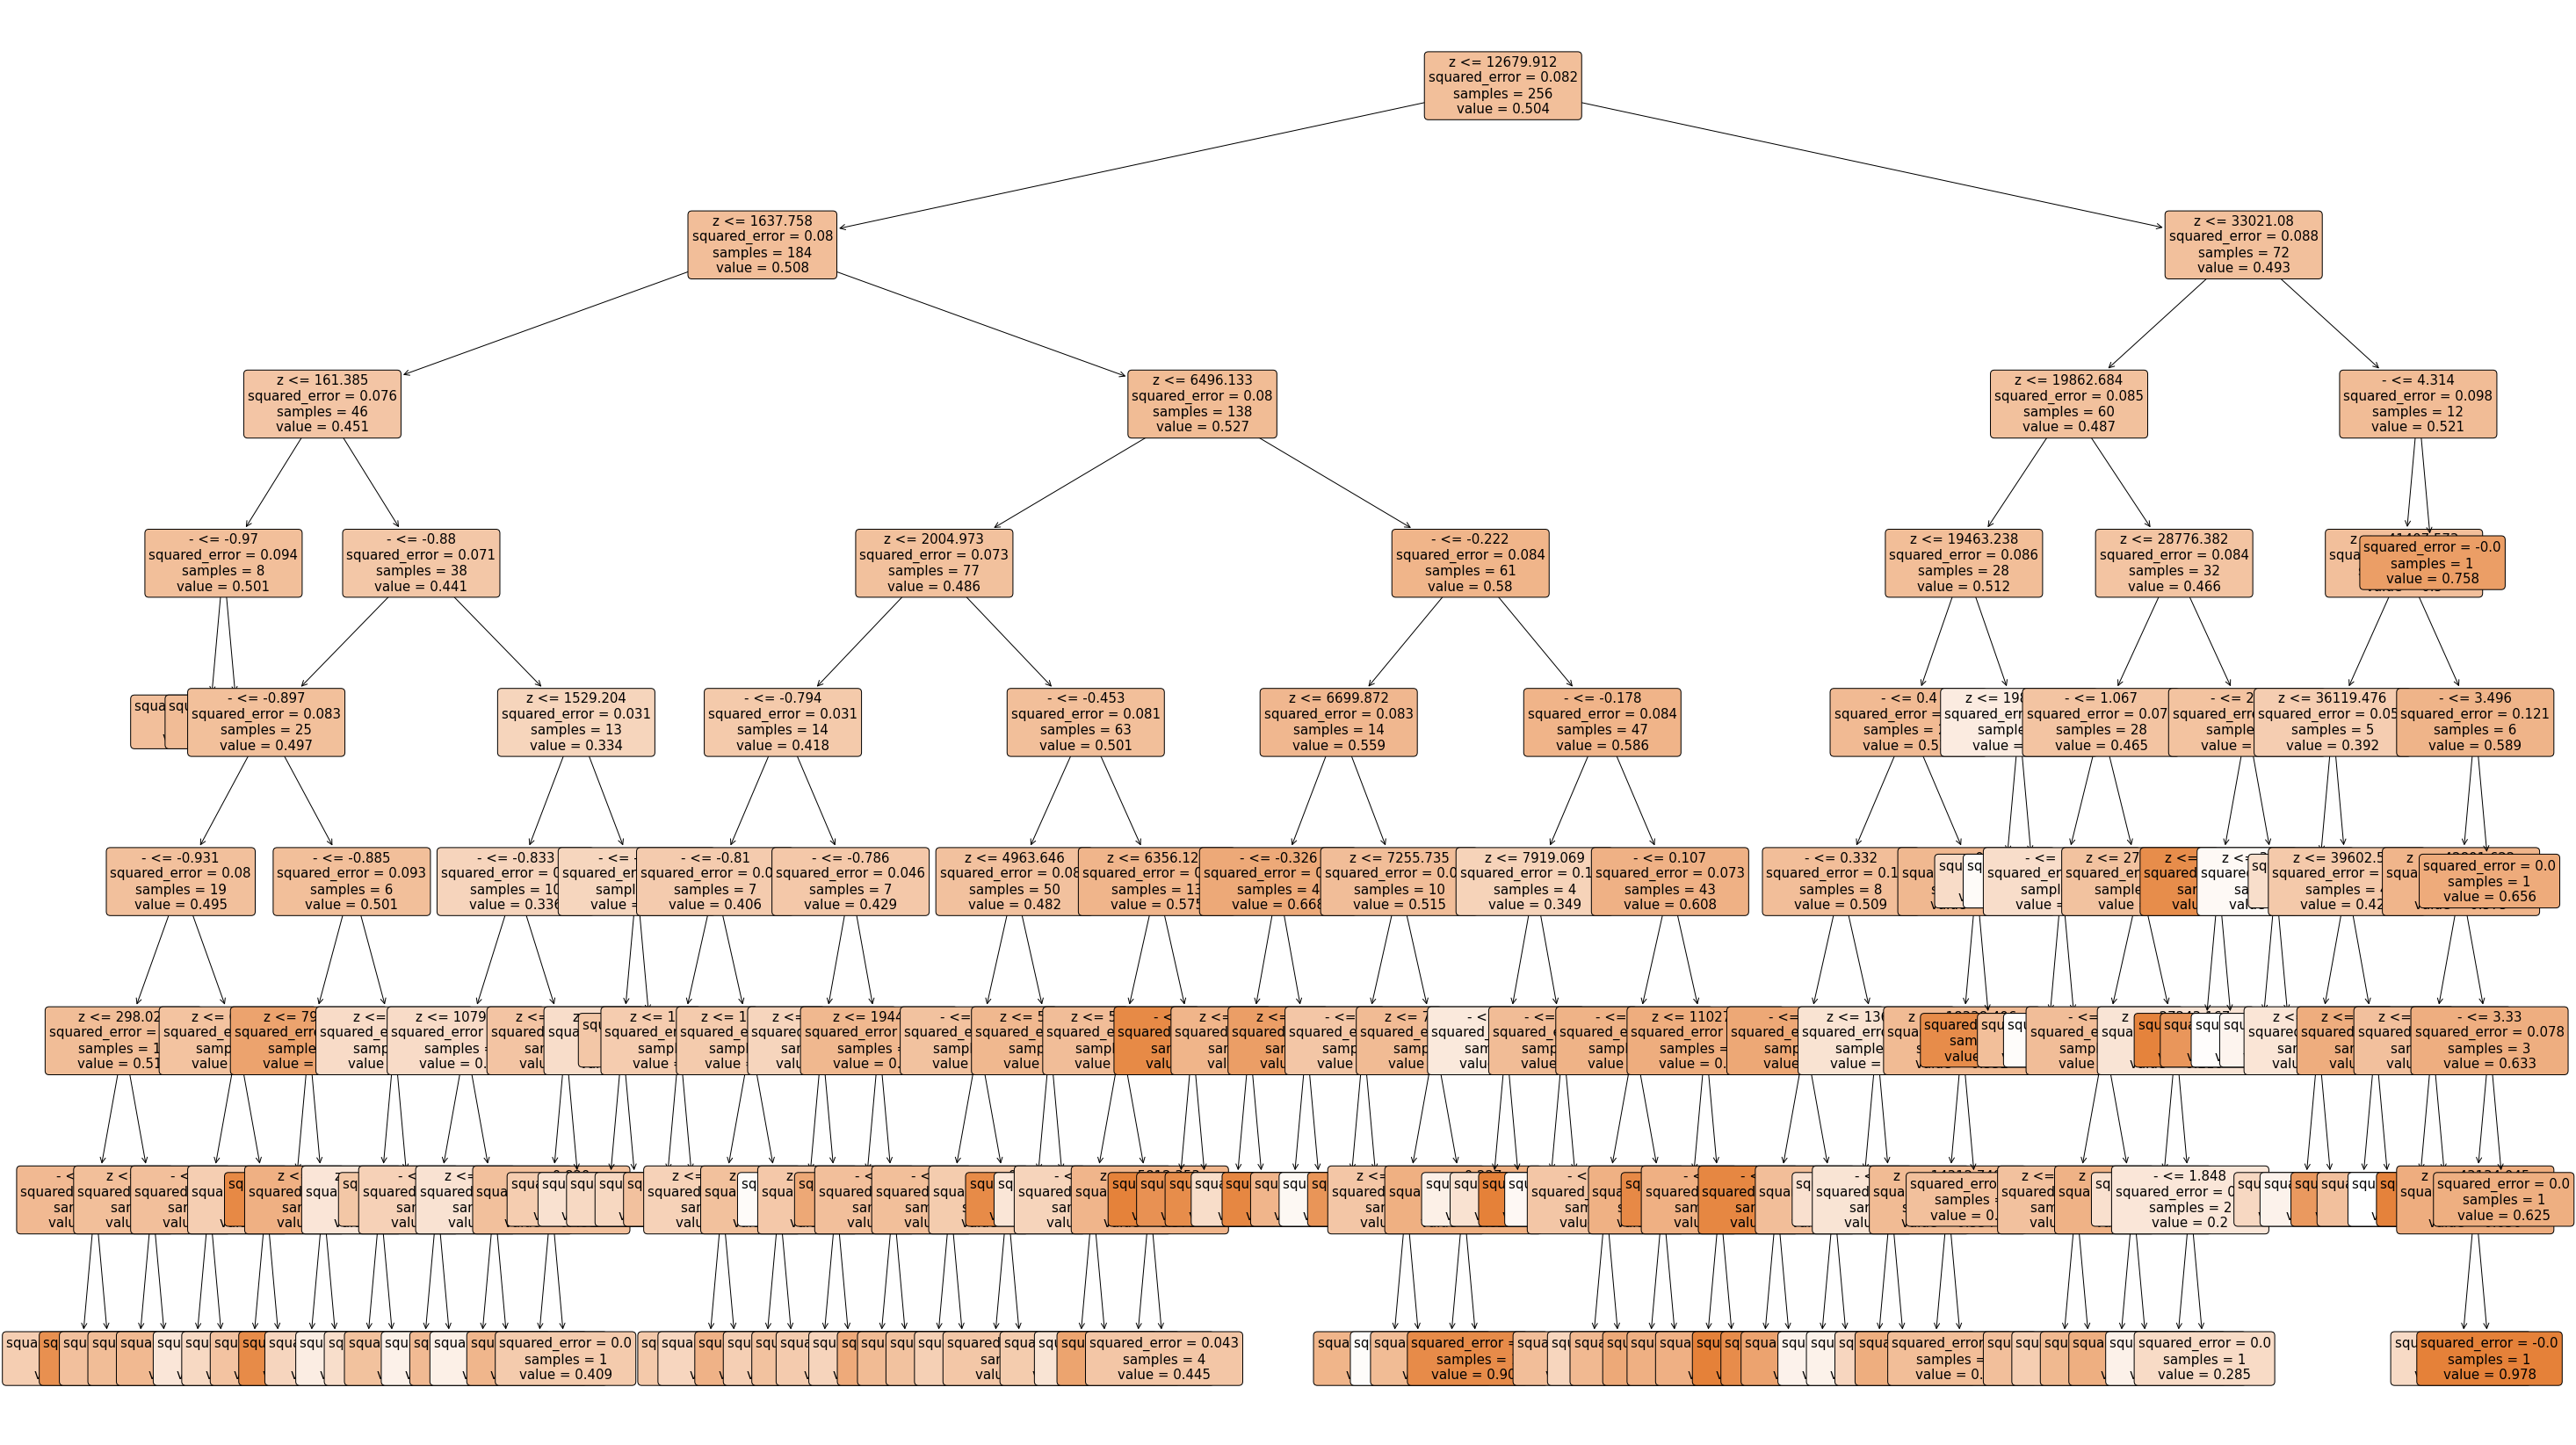

In [28]:
model2 = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = float(0.2), random_state = 43)
model2.fit(data2)

arbol2 = model2.estimators_[20]

plt.figure(figsize = (50, 30))
a = plot_tree(arbol2, feature_names = 'z-score2', filled = True, rounded = True, fontsize = 15) 

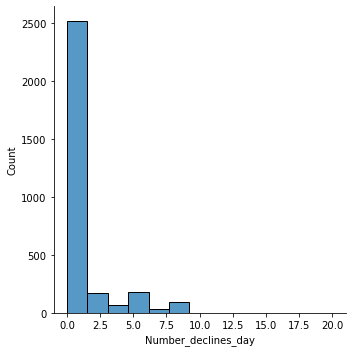

In [29]:
data_true['z-score3'] = (data_true['Number_declines_day']-data_true['Number_declines_day'].mean())/data_true['Number_declines_day'].std()
sns.displot(data_true['Number_declines_day'])


In [30]:
data3 = data_true.loc[:, ['Number_declines_day', 'z-score3']]


cond1 = data3['z-score3']>3
cond2= data3['z-score3']<-3

outliers=data3[cond1 | cond2]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 3 to 1080
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Number_declines_day  94 non-null     int64  
 1   z-score3             94 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 2.2 KB


/home/josue/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


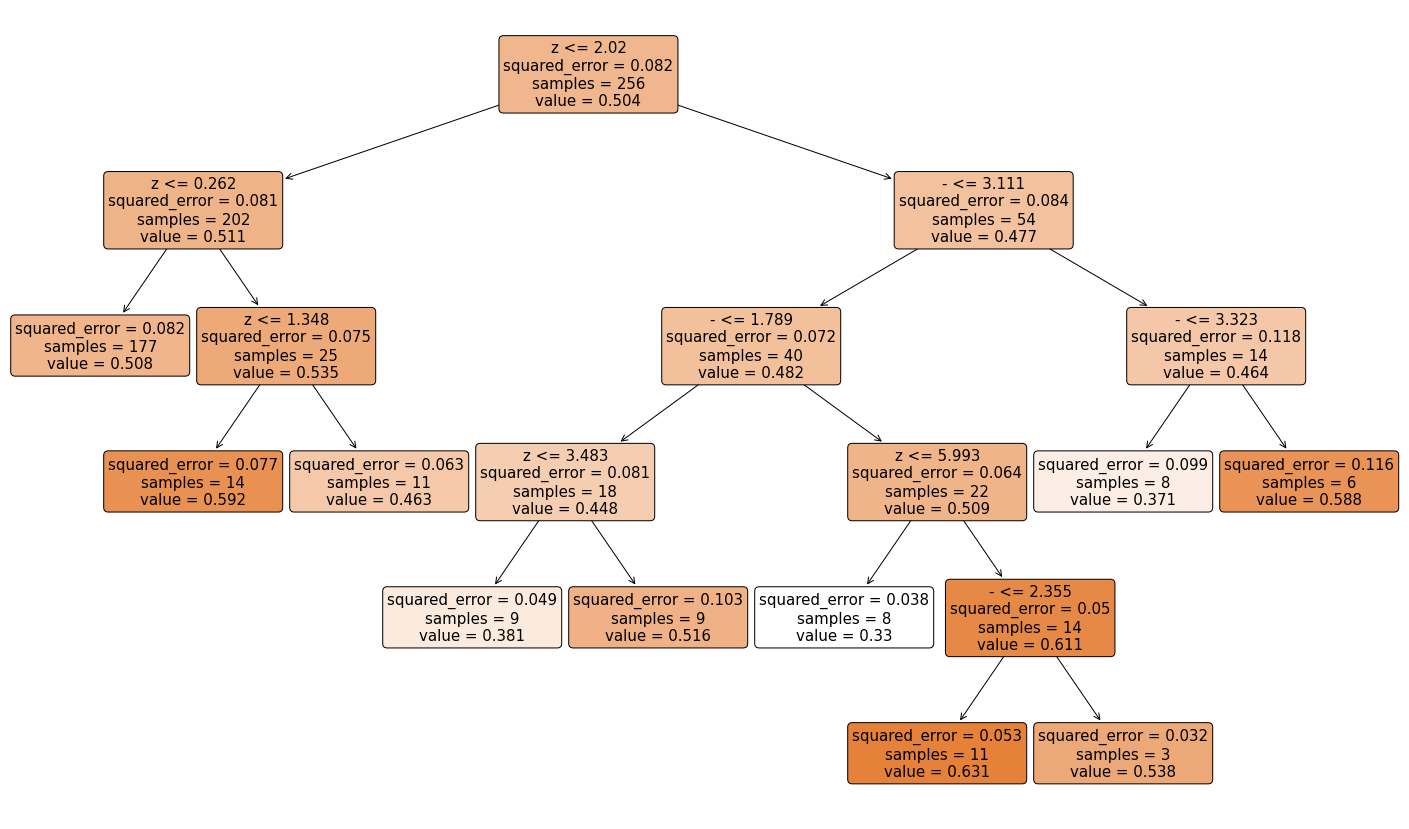

In [31]:
model3 = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = float(0.2), random_state = 43)
model3.fit(data3)

arbol3 = model3.estimators_[20]

plt.figure(figsize = (25, 15))
a = plot_tree(arbol3, feature_names = 'z-score3', filled = True, rounded = True, fontsize = 15) 

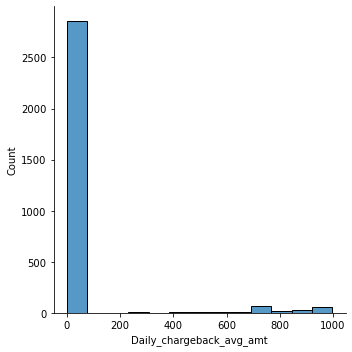

In [32]:
data_true['z-score4'] = (data_true['Daily_chargeback_avg_amt']-data_true['Daily_chargeback_avg_amt'].mean())/data_true['Daily_chargeback_avg_amt'].std()
sns.displot(data_true['Daily_chargeback_avg_amt'])


In [33]:
data4 = data_true.loc[:, ['Daily_chargeback_avg_amt', 'z-score4']]

cond1 = data4['z-score4']>3
cond2= data4['z-score4']<-3

outliers=data4[cond1 | cond2]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 4 to 3074
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily_chargeback_avg_amt  180 non-null    int64  
 1   z-score4                  180 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


/home/josue/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


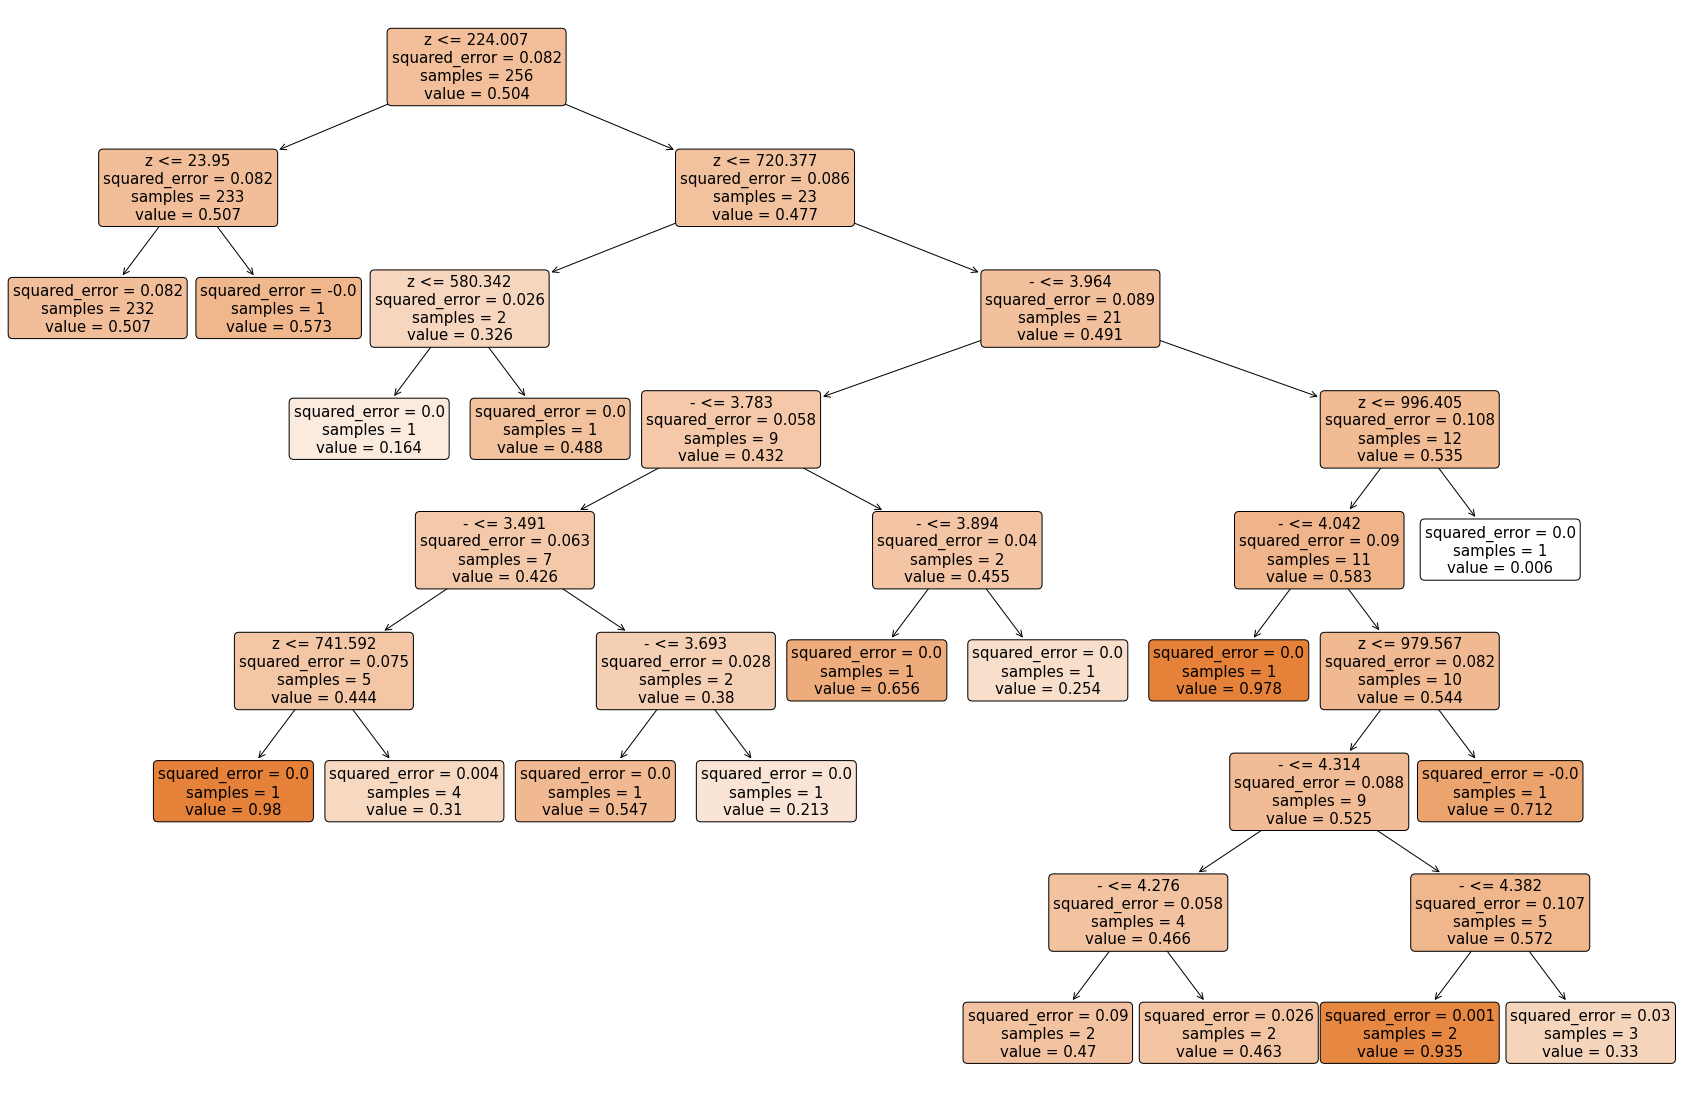

In [34]:
model4 = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = float(0.2), random_state = 43)
model4.fit(data4)

arbol4 = model4.estimators_[20]

plt.figure(figsize = (30, 20))
a = plot_tree(arbol4, feature_names = 'z-score4', filled = True, rounded = True, fontsize = 15) 

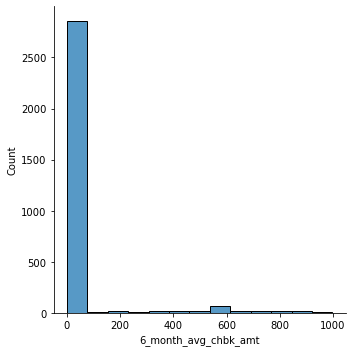

In [35]:
data_true['z-score5'] = (data_true['6_month_avg_chbk_amt']-data_true['6_month_avg_chbk_amt'].mean())/data_true['6_month_avg_chbk_amt'].std()
sns.displot(data_true['6_month_avg_chbk_amt'])


In [36]:
data5 = data_true.loc[:, ['6_month_avg_chbk_amt', 'z-score5']]

cond1 = data5['z-score5']>3
cond2= data5['z-score5']<-3

outliers=data5[cond1 | cond2]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 4 to 3074
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   6_month_avg_chbk_amt  145 non-null    float64
 1   z-score5              145 non-null    float64
dtypes: float64(2)
memory usage: 3.4 KB


/home/josue/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


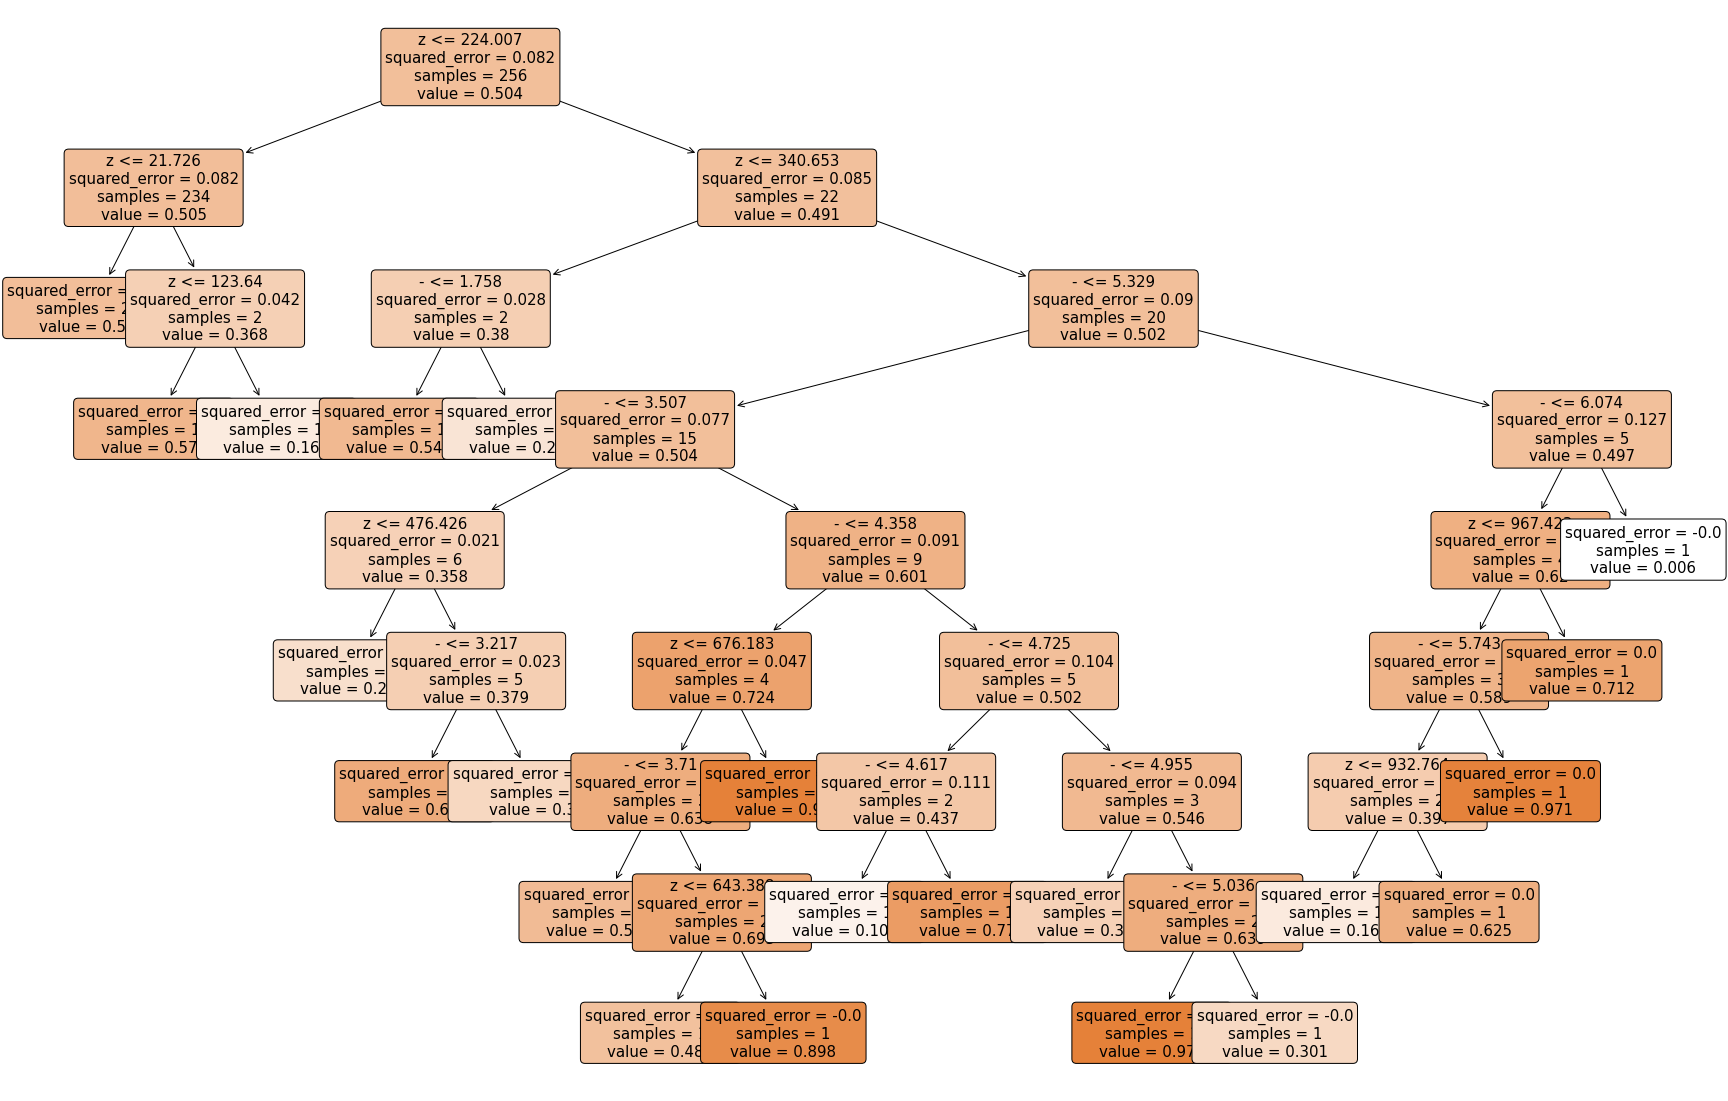

In [37]:
model5 = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = float(0.2), random_state = 43)
model5.fit(data5)

arbol5 = model5.estimators_[20]

plt.figure(figsize = (30, 20))
a = plot_tree(arbol5, feature_names = 'z-score5', filled = True, rounded = True, fontsize = 15) 

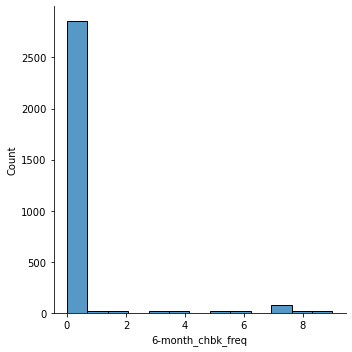

In [38]:
data_true['z-score6'] = (data_true['6-month_chbk_freq']-data_true['6-month_chbk_freq'].mean())/data_true['6-month_chbk_freq'].std()
sns.displot(data_true['6-month_chbk_freq'])


In [39]:
data6 = data_true.loc[:, ['6-month_chbk_freq', 'z-score6']]


cond1 = data6['z-score6']>3
cond2= data6['z-score6']<-3

outliers=data6[cond1 | cond2]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 4 to 3074
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   6-month_chbk_freq  128 non-null    int64  
 1   z-score6           128 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.0 KB


/home/josue/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


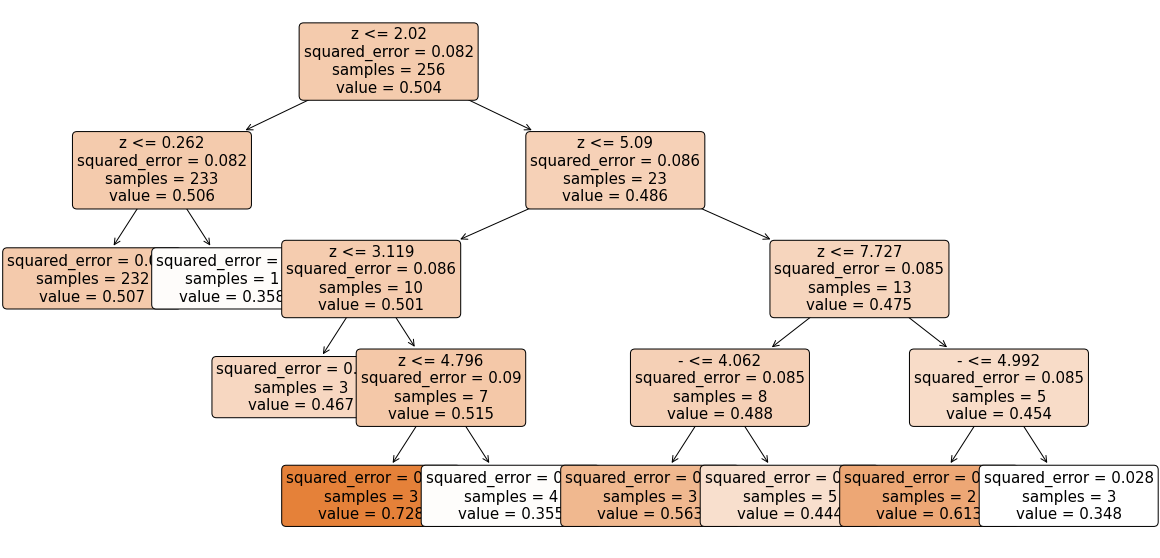

In [40]:
model6 = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = float(0.2), random_state = 43)
model6.fit(data6)

arbol6 = model6.estimators_[20]

plt.figure(figsize = (20, 10))
a = plot_tree(arbol6, feature_names = 'z-score6', filled = True, rounded = True, fontsize = 15) 

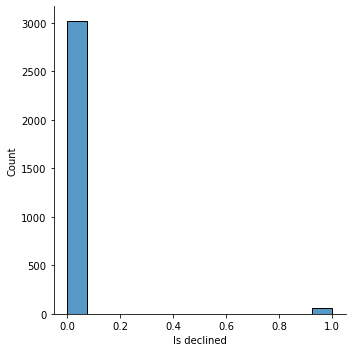

In [41]:
data_true['z-score7'] = (data_true['Is declined']-data_true['Is declined'].mean())/data_true['Is declined'].std()
sns.displot(data_true['Is declined'])


In [42]:
data7 = data_true.loc[:, ['Is declined', 'z-score7']]
cond1 = data7['z-score7']>3
cond2= data7['z-score7']<-3

outliers=data7[cond1 | cond2]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 2 to 3074
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Is declined  57 non-null     int64  
 1   z-score7     57 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.3 KB


/home/josue/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


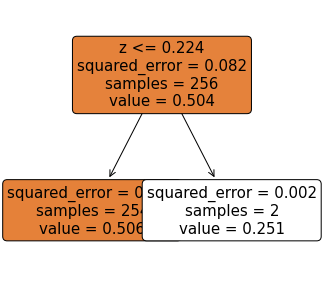

In [43]:
model7 = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = float(0.2), random_state = 43)
model7.fit(data7)

arbol7 = model7.estimators_[20]

plt.figure(figsize = (5, 5))
a = plot_tree(arbol7, feature_names = 'z-score7', filled = True, rounded = True, fontsize = 15) 

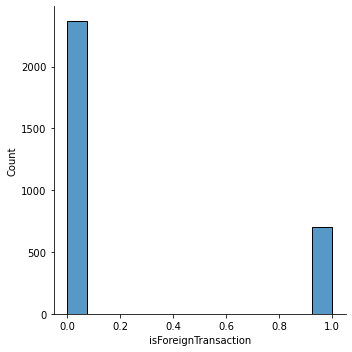

In [44]:
data_true['z-score8'] = (data_true['isForeignTransaction']-data_true['isForeignTransaction'].mean())/data_true['isForeignTransaction'].std()
sns.displot(data_true['isForeignTransaction'])


In [45]:
data8 = data_true.loc[:, ['isForeignTransaction', 'z-score8']]

cond1 = data8['z-score8']>3
cond2= data8['z-score8']<-3

outliers=data8[cond1 | cond2]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isForeignTransaction  0 non-null      int64  
 1   z-score8              0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 0.0 bytes


/home/josue/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


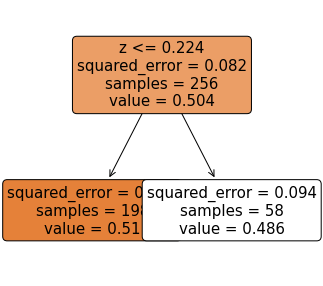

In [46]:
model8 = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = float(0.2), random_state = 43)
model8.fit(data8)

arbol8 = model8.estimators_[20]

plt.figure(figsize = (5, 5))
a = plot_tree(arbol8, feature_names = 'z-score8', filled = True, rounded = True, fontsize = 15) 

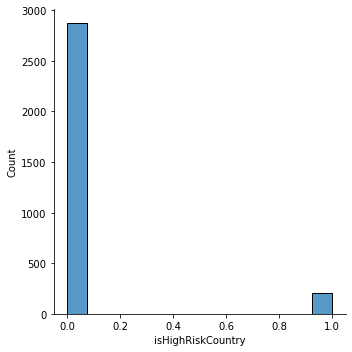

In [47]:
data_true['z-score9'] = (data_true['isHighRiskCountry']-data_true['isHighRiskCountry'].mean())/data_true['isHighRiskCountry'].std()
sns.displot(data_true['isHighRiskCountry'])


In [48]:
data9 = data_true.loc[:, ['isHighRiskCountry', 'z-score9']]


cond1 = data9['z-score9']>3
cond2= data9['z-score9']<-3

outliers=data9[cond1 | cond2]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 3074
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   isHighRiskCountry  205 non-null    int64  
 1   z-score9           205 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


/home/josue/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


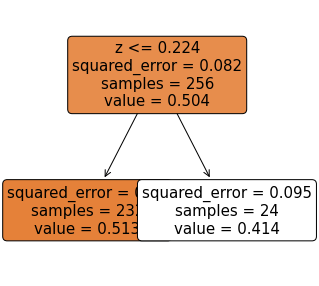

In [49]:
model9 = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = float(0.2), random_state = 43)
model9.fit(data9)

arbol9 = model9.estimators_[20]

plt.figure(figsize = (5, 5))
a = plot_tree(arbol9, feature_names = 'z-score9', filled = True, rounded = True, fontsize = 15) 

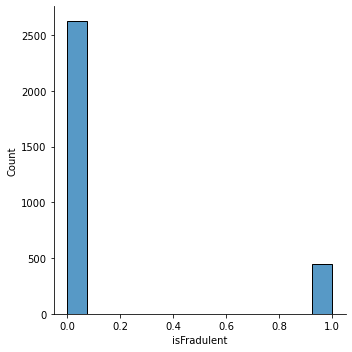

In [50]:
data_true['z-score10'] = (data_true['isFradulent']-data_true['isFradulent'].mean())/data_true['isFradulent'].std()
sns.displot(data_true['isFradulent'])


In [51]:
data10 = data_true.loc[:, ['isFradulent', 'z-score10']]

cond1 = data10['z-score10']>3
cond2= data10['z-score10']<-3

outliers=data10[cond1 | cond2]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   isFradulent  0 non-null      int64  
 1   z-score10    0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 0.0 bytes


/home/josue/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


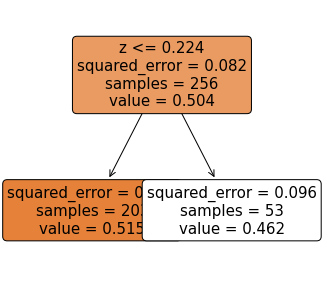

In [52]:
model10 = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = float(0.2), random_state = 43)
model10.fit(data10)

arbol10 = model10.estimators_[20]

plt.figure(figsize = (5, 5))
a = plot_tree(arbol10, feature_names = 'z-score10', filled = True, rounded = True, fontsize = 15) 